<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204049 entries, 0 to 204048
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        204049 non-null  float64
 1   bytes_in       204049 non-null  int64  
 2   bytes_out      204049 non-null  int64  
 3   dest_ip        204049 non-null  int64  
 4   dest_port      199472 non-null  float64
 5   entropy        204049 non-null  float64
 6   num_pkts_out   204048 non-null  float64
 7   num_pkts_in    204048 non-null  float64
 8   proto          204048 non-null  float64
 9   src_ip         204048 non-null  float64
 10  src_port       199471 non-null  float64
 11  time_end       204048 non-null  float64
 12  time_start     204048 non-null  float64
 13  total_entropy  204048 non-null  float64
 14  label          204048 non-null  object 
 15  duration       204048 non-null  float64
dtypes: float64(12), int64(3), object(1)
memory usage: 24.9+ MB
label values: [

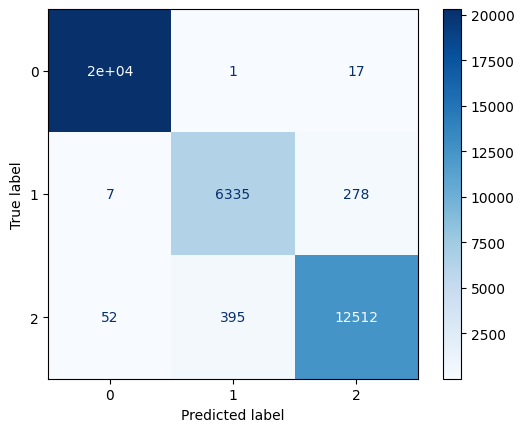

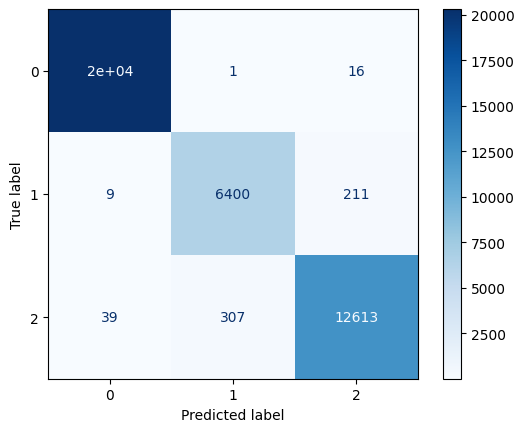

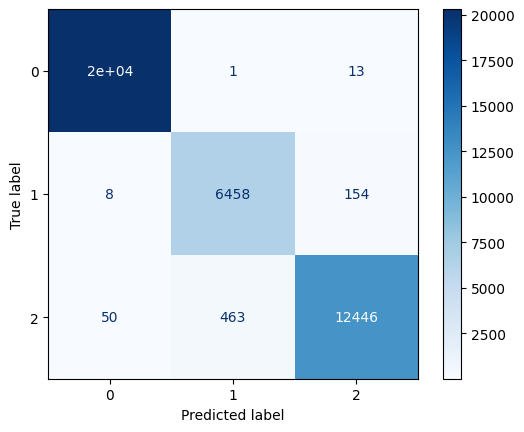

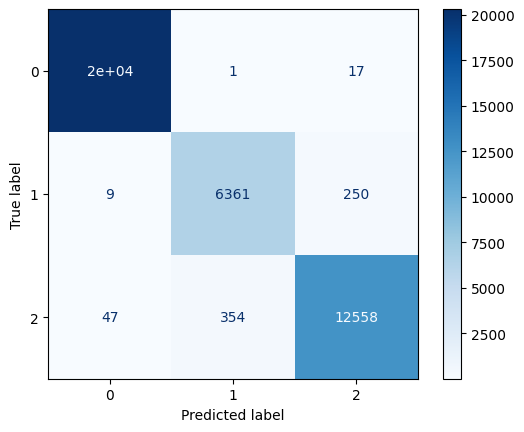

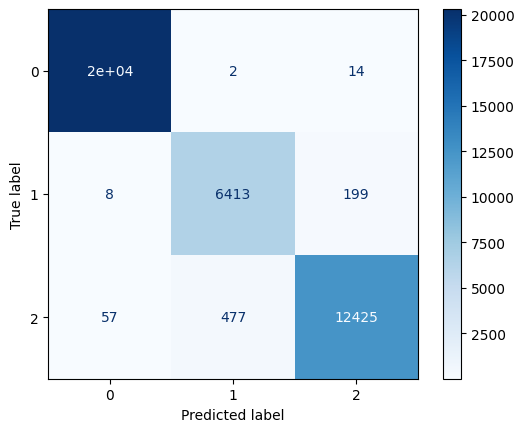

In [47]:
#more knn runs but taking all the models for k = 2-7 and comparing them on the 20th data after training on the 19th
#uses code from sklearn apis for knn and confusion matrix 

import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron

# import data
filename = '2020.06.19.csv'
df = pd.read_csv(filename)

# sample small subset
# df = df.sample(500000, random_state=78)
df.info()
df.head(10)

# clean data
df.dropna(inplace=True)
df.isna().sum()

# need to clean for features that are 0 and don't make sense (bytes = 0?)

print('label values:', df['label'].unique())

def ordinal_encoder(category):
    dict = {'benign':0, 'outlier':1, 'malicious':2}
    return dict[category]

print('benign', ordinal_encoder('benign'))
print('outlier', ordinal_encoder('outlier'))
print('malicious', ordinal_encoder('malicious'))
df['label'] = df['label'].apply(ordinal_encoder)

features = ['avg_ipt', 
            'bytes_in', 
            'bytes_out', 
            'dest_ip', 
            'dest_port', 
            'entropy', 
            'num_pkts_in',
            'num_pkts_out', 
            'proto', 
            'src_ip', 
            'src_port', 
            'time_end', 
            'time_start', 
            'total_entropy', 
            'duration']

X = df.loc[:, features]
y = df.loc[:,'label']

# Scale features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# try PolyScaler?

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# test/train split

from sklearn.model_selection import train_test_split

# 80/20 training/validation split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=.8, test_size=.2, random_state=42)

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

# should print number of shape: (num features, num entries)
print('Training set: ', 'X: ', X_train.shape, 'y: ', y_train.shape, 'Validation set: ', 'X: ', X_val.shape, 'printy: ', y_val.shape)

print(X_train[1])
print(y_train[1])


# import tensorflow and keras

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

import os



#Multiclass classifier KNN and SVM

# training a KNN classifier 7 neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_val, y_val)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_val) 
cmknn = confusion_matrix(y_val, knn_predictions)

# from sklearn.svm import SVC
# svm_model_rbf = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
# svm_predictions = svm_model_rbf.predict(X_val)
  
 
# accuracy = svm_model_rbf.score(X_val, y_val)
  
# # creating a confusion matrix
# cmSVC = confusion_matrix(y_val, svm_predictions)




print (cmknn)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df['label'].unique()
disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)



# accuracy on 3 neighbors
knn3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn3.score(X_val, y_val)
print(accuracy)
  
# creating a confusion matrix
knn3_predictions = knn3.predict(X_val) 
cmknn3 = confusion_matrix(y_val, knn3_predictions)


print (cmknn3)
# print (cmSVC)


classes = df['label'].unique()
dispknn3 = ConfusionMatrixDisplay.from_estimator(
        knn3,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )

print(dispknn3.confusion_matrix)

# accuracy on 4 neighbors
knn4 = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn4.score(X_val, y_val)
print(accuracy)
  
# creating a confusion matrix
knn4_predictions = knn4.predict(X_val) 
cmknn4 = confusion_matrix(y_val, knn4_predictions)


print (cmknn4)
# print (cmSVC)


classes = df['label'].unique()
dispknn4 = ConfusionMatrixDisplay.from_estimator(
        knn4,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )

print(dispknn4.confusion_matrix)



# accuracy on 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn5.score(X_val, y_val)
print(accuracy)
  
# creating a confusion matrix
knn5_predictions = knn5.predict(X_val) 
cmknn5 = confusion_matrix(y_val, knn5_predictions)


print (cmknn5)
# print (cmSVC)


classes = df['label'].unique()
dispknn5 = ConfusionMatrixDisplay.from_estimator(
        knn5,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )

print(dispknn5.confusion_matrix)



# accuracy on 6 neighbors
knn6 = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn6.score(X_val, y_val)
print(accuracy)
  
# creating a confusion matrix
knn6_predictions = knn6.predict(X_val) 
cmknn6 = confusion_matrix(y_val, knn6_predictions)


print (cmknn6)
# print (cmSVC)


classes = df['label'].unique()
dispknn6 = ConfusionMatrixDisplay.from_estimator(
        knn6,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )

print(dispknn6.confusion_matrix)

# classes = df['label'].unique()
# dispsvn = ConfusionMatrixDisplay.from_estimator(
#         svm_model_rbf,
#         X_val,
#         y_val,
#         display_labels= classes,
#         cmap=plt.cm.Blues,
#     )

# print(dispsvn.confusion_matrix)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770853 entries, 0 to 770852
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        770853 non-null  float64
 1   bytes_in       770853 non-null  int64  
 2   bytes_out      770853 non-null  int64  
 3   dest_ip        770853 non-null  int64  
 4   dest_port      770853 non-null  int64  
 5   entropy        770853 non-null  float64
 6   num_pkts_out   770853 non-null  int64  
 7   num_pkts_in    770853 non-null  int64  
 8   proto          770853 non-null  int64  
 9   src_ip         770853 non-null  int64  
 10  src_port       770853 non-null  int64  
 11  time_end       770853 non-null  int64  
 12  time_start     770853 non-null  int64  
 13  total_entropy  770853 non-null  float64
 14  label          770853 non-null  object 
 15  duration       770853 non-null  float64
dtypes: float64(4), int64(11), object(1)
memory usage: 94.1+ MB
label values: [

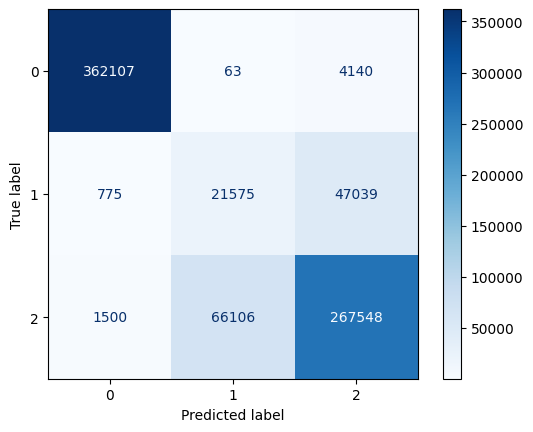

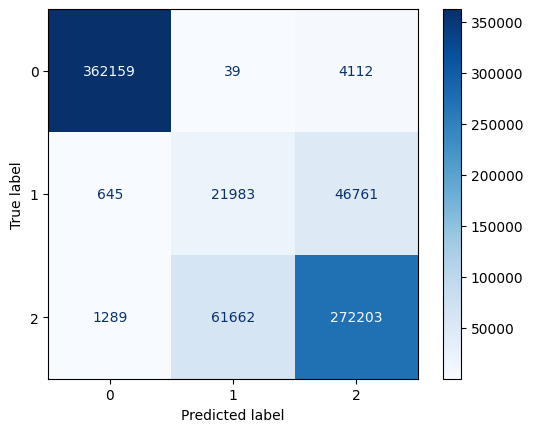

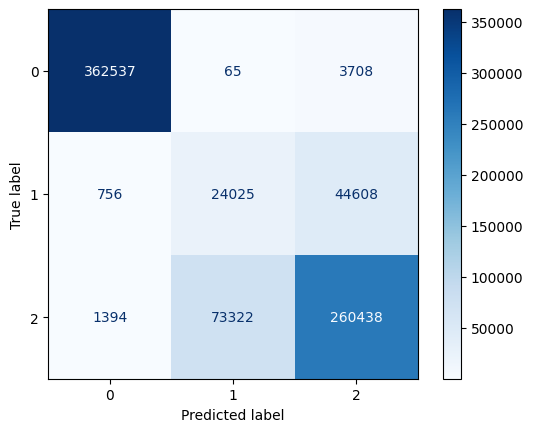

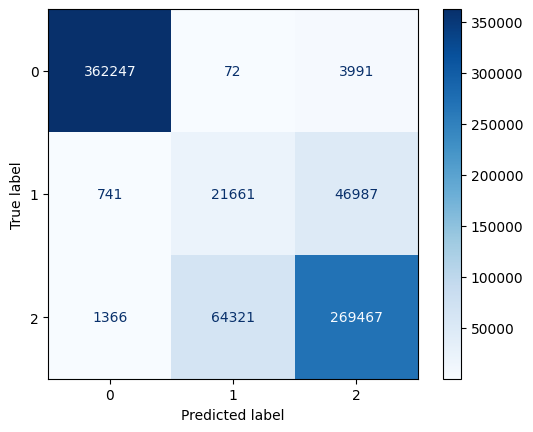

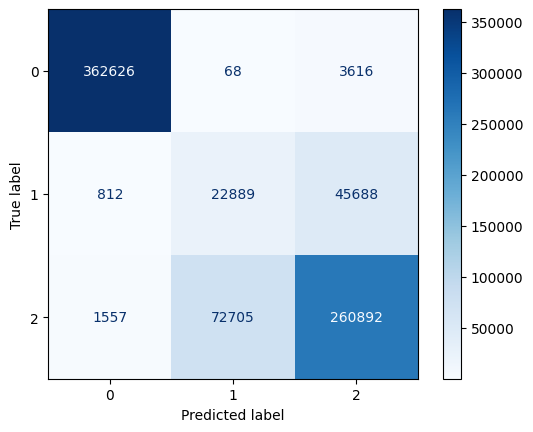

In [52]:
# import data
filename = '2020.06.20.csv'
df20 = pd.read_csv(filename)

# sample small subset
# df = df.sample(500000, random_state=78)
df20.info()
df20.head(10)

# clean data
df20.dropna(inplace=True)
df20.isna().sum()

# need to clean for features that are 0 and don't make sense (bytes = 0?)

print('label values:', df20['label'].unique())

def ordinal_encoder(category):
    dict = {'benign':0, 'outlier':1, 'malicious':2}
    return dict[category]

print('benign', ordinal_encoder('benign'))
print('outlier', ordinal_encoder('outlier'))
print('malicious', ordinal_encoder('malicious'))
df20['label'] = df20['label'].apply(ordinal_encoder)

features = ['avg_ipt', 
            'bytes_in', 
            'bytes_out', 
            'dest_ip', 
            'dest_port', 
            'entropy', 
            'num_pkts_in',
            'num_pkts_out', 
            'proto', 
            'src_ip', 
            'src_port', 
            'time_end', 
            'time_start', 
            'total_entropy', 
            'duration']

X20init = df20.loc[:, features]
y20 = df20.loc[:,'label']
# print(X20init[:10])
# print(y20[:10])

# Scale features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# try PolyScaler?

scaler = StandardScaler()
scaler.fit(X20init)
X20 = scaler.transform(X20init)

# # test/train split

# from sklearn.model_selection import train_test_split

# # 80/20 training/validation split
# X_train_20, X_val_20, y_train_20, y_val_20 = train_test_split(X20,y20, train_size=.8, test_size=.2, random_state=42)

# y_train_20 = y_train_20.to_numpy()
# y_val_20 = y_val_20.to_numpy()

# # should print number of shape: (num features, num entries)
# print('Training set: ', 'X: ', X_train_20.shape, 'y: ', y_train_20.shape, 'Validation set: ', 'X: ', X_val_20.shape, 'printy: ', y_val_20.shape)

# print(X_train_20[1])
# print(y_train_20[1])


print("Scores from N=7 on 6-20-2022 data")


# accuracy on X_test
accuracyknn19_on_20 = knn.score(X20, y20)
print(accuracyknn19_on_20)
  
# creating a confusion matrix
knn_predictions19_20 = knn.predict(X20) 
cmknn19_20 = confusion_matrix(y20, knn_predictions19_20)


 
# print(knn_predictions)
# print(knn_predictions19_20)
# print(knn_predictions[:10])
# print(knn_predictions19_20[:10])
# print(X20[:10])
# print(y20[:10])
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

print(classification_report(y20, knn_predictions19_20, labels=[0, 1, 2]))
print(multilabel_confusion_matrix(y20,knn_predictions19_20,labels=[0,1,2]))


print (cmknn19_20)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df20['label'].unique()
disp19_20 = ConfusionMatrixDisplay.from_estimator(
        knn,
        X20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disp19_20.confusion_matrix)

# 20 data run with knn3 model

print("Scores from N=3 on 6-20-2022 data")
# accuracy on X_test
accuracyknn319_on_20 = knn3.score(X20, y20)
print(accuracyknn319_on_20)
  
# creating a confusion matrix
knn3_predictions19_20 = knn3.predict(X20) 
cmknn319_20 = confusion_matrix(y20, knn3_predictions19_20)




# print(knn3_predictions)
# print(knn3_predictions19_20)
# print(knn3_predictions[:10])
# print(knn3_predictions19_20[:10])
# print(X20[:10])
# print(y20[:10])

print(classification_report(y20, knn3_predictions19_20, labels=[0, 1, 2]))
print(multilabel_confusion_matrix(y20,knn3_predictions19_20,labels=[0,1,2]))


print (cmknn319_20)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df20['label'].unique()
disp319_20 = ConfusionMatrixDisplay.from_estimator(
        knn3,
        X20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disp319_20.confusion_matrix)



# 20 data run with knn4 model

print("Scores from N=4 on 6-20-2022 data")
# accuracy on X_test
accuracyknn419_on_20 = knn4.score(X20, y20)
print(accuracyknn419_on_20)
  
# creating a confusion matrix
knn4_predictions19_20 = knn4.predict(X20) 
cmknn419_20 = confusion_matrix(y20, knn4_predictions19_20)




# print(knn4_predictions)
# print(knn4_predictions19_20)
# print(knn4_predictions[:10])
# print(knn4_predictions19_20[:10])
# print(X20[:10])
# print(y20[:10])

print(classification_report(y20, knn4_predictions19_20, labels=[0, 1, 2]))
print(multilabel_confusion_matrix(y20,knn4_predictions19_20,labels=[0,1,2]))


print (cmknn419_20)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df20['label'].unique()
disp419_20 = ConfusionMatrixDisplay.from_estimator(
        knn4,
        X20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disp319_20.confusion_matrix)



# 20 data run with knn5 model
print("Scores from N=5 on 6-20-2022 data")

# accuracy on X_test
accuracyknn519_on_20 = knn5.score(X20, y20)
print(accuracyknn519_on_20)
  
# creating a confusion matrix
knn5_predictions19_20 = knn5.predict(X20) 
cmknn519_20 = confusion_matrix(y20, knn5_predictions19_20)




# print(knn5_predictions)
# print(knn5_predictions19_20)
# print(knn5_predictions[:10])
# print(knn5_predictions19_20[:10])
# print(X20[:10])
# print(y20[:10])

print(classification_report(y20, knn5_predictions19_20, labels=[0, 1, 2]))
print(multilabel_confusion_matrix(y20,knn5_predictions19_20,labels=[0,1,2]))


print (cmknn519_20)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df20['label'].unique()
disp519_20 = ConfusionMatrixDisplay.from_estimator(
        knn5,
        X20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disp519_20.confusion_matrix)



# 20 data run with knn6 model
print("Scores from N=6 on 6-20-2022 data")

# accuracy on X_test
accuracyknn619_on_20 = knn6.score(X20, y20)
print(accuracyknn619_on_20)
  
# creating a confusion matrix
knn6_predictions19_20 = knn6.predict(X20) 
cmknn619_20 = confusion_matrix(y20, knn6_predictions19_20)




# print(knn6_predictions)
# print(knn6_predictions19_20)
# print(knn6_predictions[:10])
# print(knn6_predictions19_20[:10])
# print(X20[:10])
# print(y20[:10])

print(classification_report(y20, knn6_predictions19_20, labels=[0, 1, 2]))
print(multilabel_confusion_matrix(y20,knn6_predictions19_20,labels=[0,1,2]))


print (cmknn619_20)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df20['label'].unique()
disp619_20 = ConfusionMatrixDisplay.from_estimator(
        knn6,
        X20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disp619_20.confusion_matrix)

In [ ]:
print(classes)
print(df20['label'].unique())
print(df['label'].unique())

In [ ]:

classes2 = classes
np.sort(classes2)

disptest = ConfusionMatrixDisplay.from_predictions(
        knn_predictions19_20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disptest.confusion_matrix)
print(y20.value_counts())
print(classes)
print(classes2)

0.9889209174081965
[[20299     1    16]
 [    9  6400   211]
 [   39   307 12613]]
[[20304     0    12]
 [    4  6447   169]
 [   29   228 12702]]


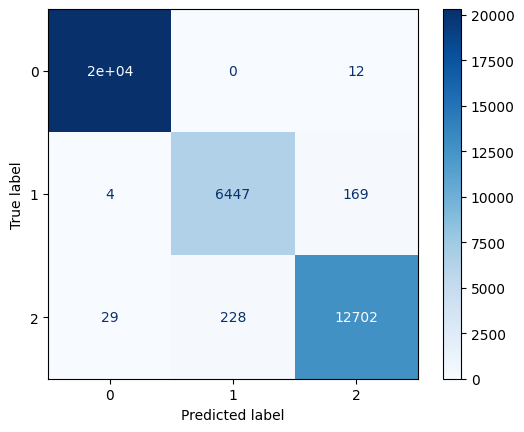

In [54]:
knn2 = KNeighborsClassifier(n_neighbors = 2,weights='distance',algorithm='brute').fit(X_train, y_train)

accuracy = knn2.score(X_val, y_val)
print(accuracy)
  
# creating a confusion matrix
knn2_predictions = knn2.predict(X_val) 
cmknn2 = confusion_matrix(y_val, knn2_predictions)


print (cmknn3)
# print (cmSVC)


classes = df['label'].unique()
dispknn2 = ConfusionMatrixDisplay.from_estimator(
        knn2,
        X_val,
        y_val,
        cmap=plt.cm.Blues,
    )

print(dispknn2.confusion_matrix)


Scores from N=2 on 6-20-2022 data
0.8490801748193235
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    366310
           1       0.26      0.33      0.29     69389
           2       0.84      0.80      0.82    335154

    accuracy                           0.85    770853
   macro avg       0.70      0.71      0.70    770853
weighted avg       0.86      0.85      0.86    770853

[[[403235   1308]
  [  3092 363218]]

 [[635837  65627]
  [ 46756  22633]]

 [[386297  49402]
  [ 66489 268665]]]
[[363218     35   3057]
 [   411  22633  46345]
 [   897  65592 268665]]
[[363218     35   3057]
 [   411  22633  46345]
 [   897  65592 268665]]


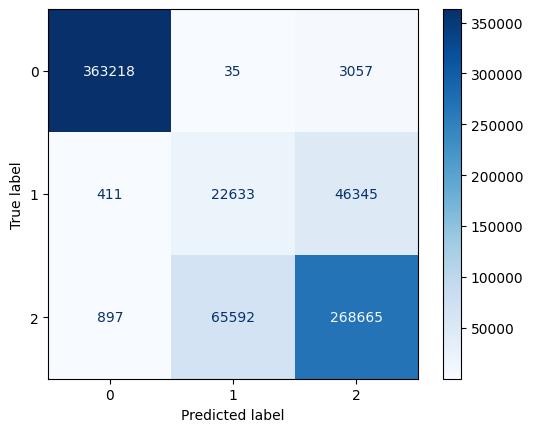

In [55]:
# 20 data run with knn2 model
print("Scores from N=2 on 6-20-2022 data")

# accuracy on X_test
accuracyknn219_on_20 = knn2.score(X20, y20)
print(accuracyknn219_on_20)
  
# creating a confusion matrix
knn2_predictions19_20 = knn2.predict(X20) 
cmknn219_20 = confusion_matrix(y20, knn2_predictions19_20)




# print(knn6_predictions)
# print(knn6_predictions19_20)
# print(knn6_predictions[:10])
# print(knn6_predictions19_20[:10])
# print(X20[:10])
# print(y20[:10])

print(classification_report(y20, knn2_predictions19_20, labels=[0, 1, 2]))
print(multilabel_confusion_matrix(y20,knn2_predictions19_20,labels=[0,1,2]))


print (cmknn219_20)
# print (cmSVC)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
classes = df20['label'].unique()
disp219_20 = ConfusionMatrixDisplay.from_estimator(
        knn2,
        X20,
        y20,
        cmap=plt.cm.Blues,
    )

print(disp219_20.confusion_matrix)

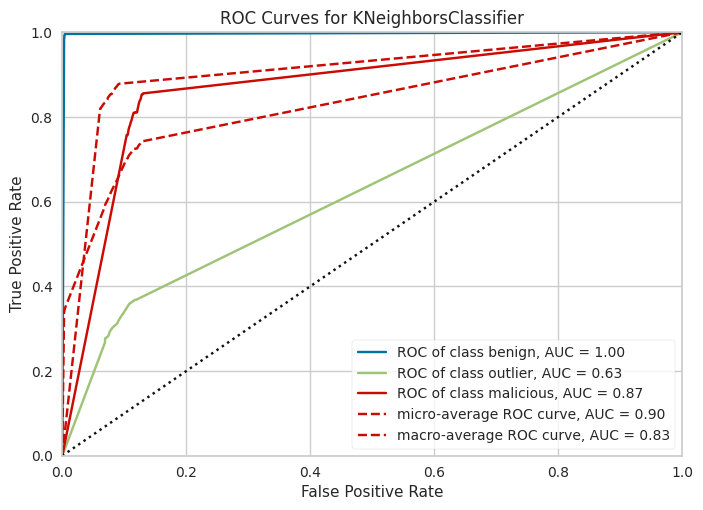

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [58]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn2, classes=['benign', 'outlier', 'malicious'])
visualizer.fit(X_train, y_train)
visualizer.score(X20, y20)
visualizer.show()

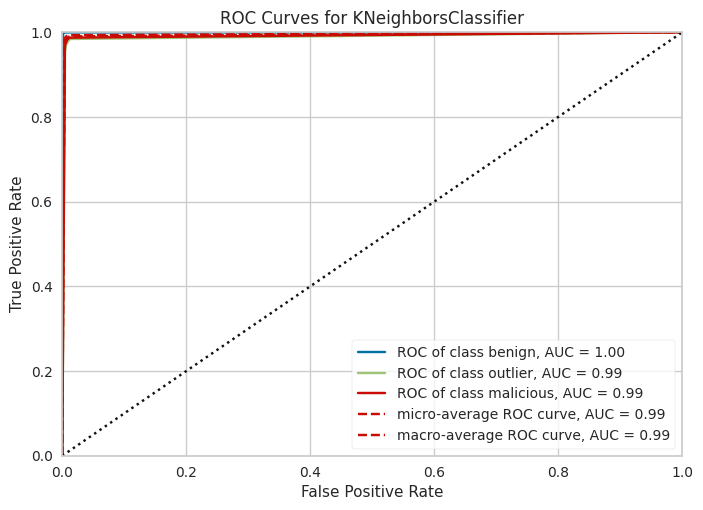

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
visualizer = ROCAUC(knn2, classes=['benign', 'outlier', 'malicious'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val,y_val)
visualizer.show()

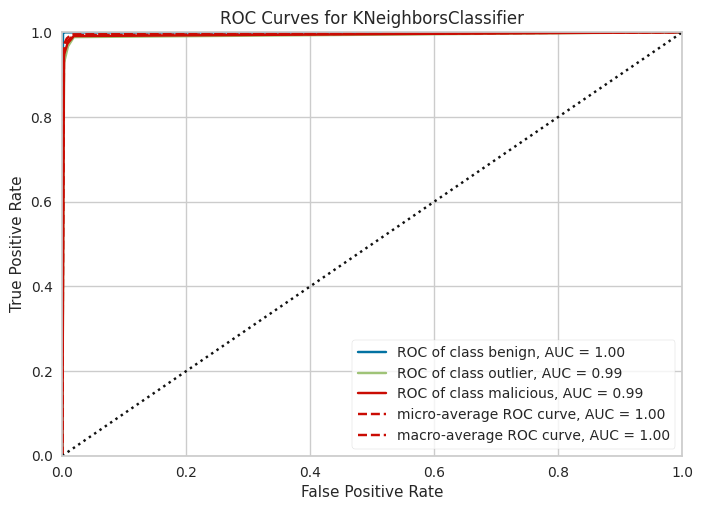

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
visualizer = ROCAUC(knn3, classes=['benign', 'outlier', 'malicious'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val,y_val)
visualizer.show()

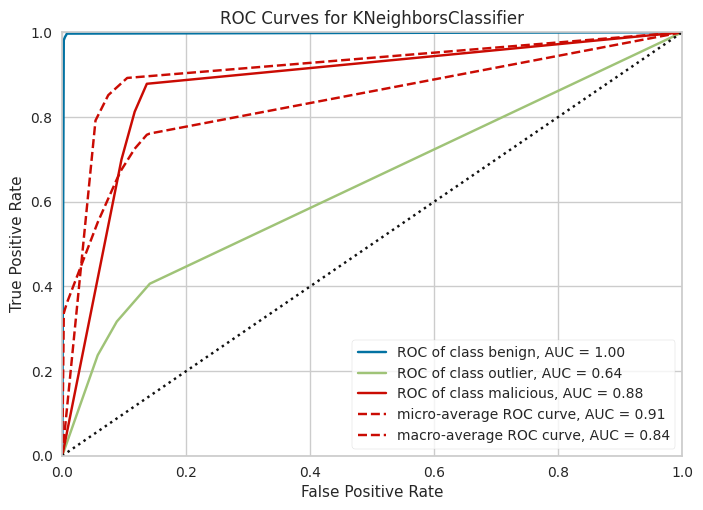

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [61]:
visualizer = ROCAUC(knn3, classes=['benign', 'outlier', 'malicious'])
visualizer.fit(X_train, y_train)
visualizer.score(X20,y20)
visualizer.show()

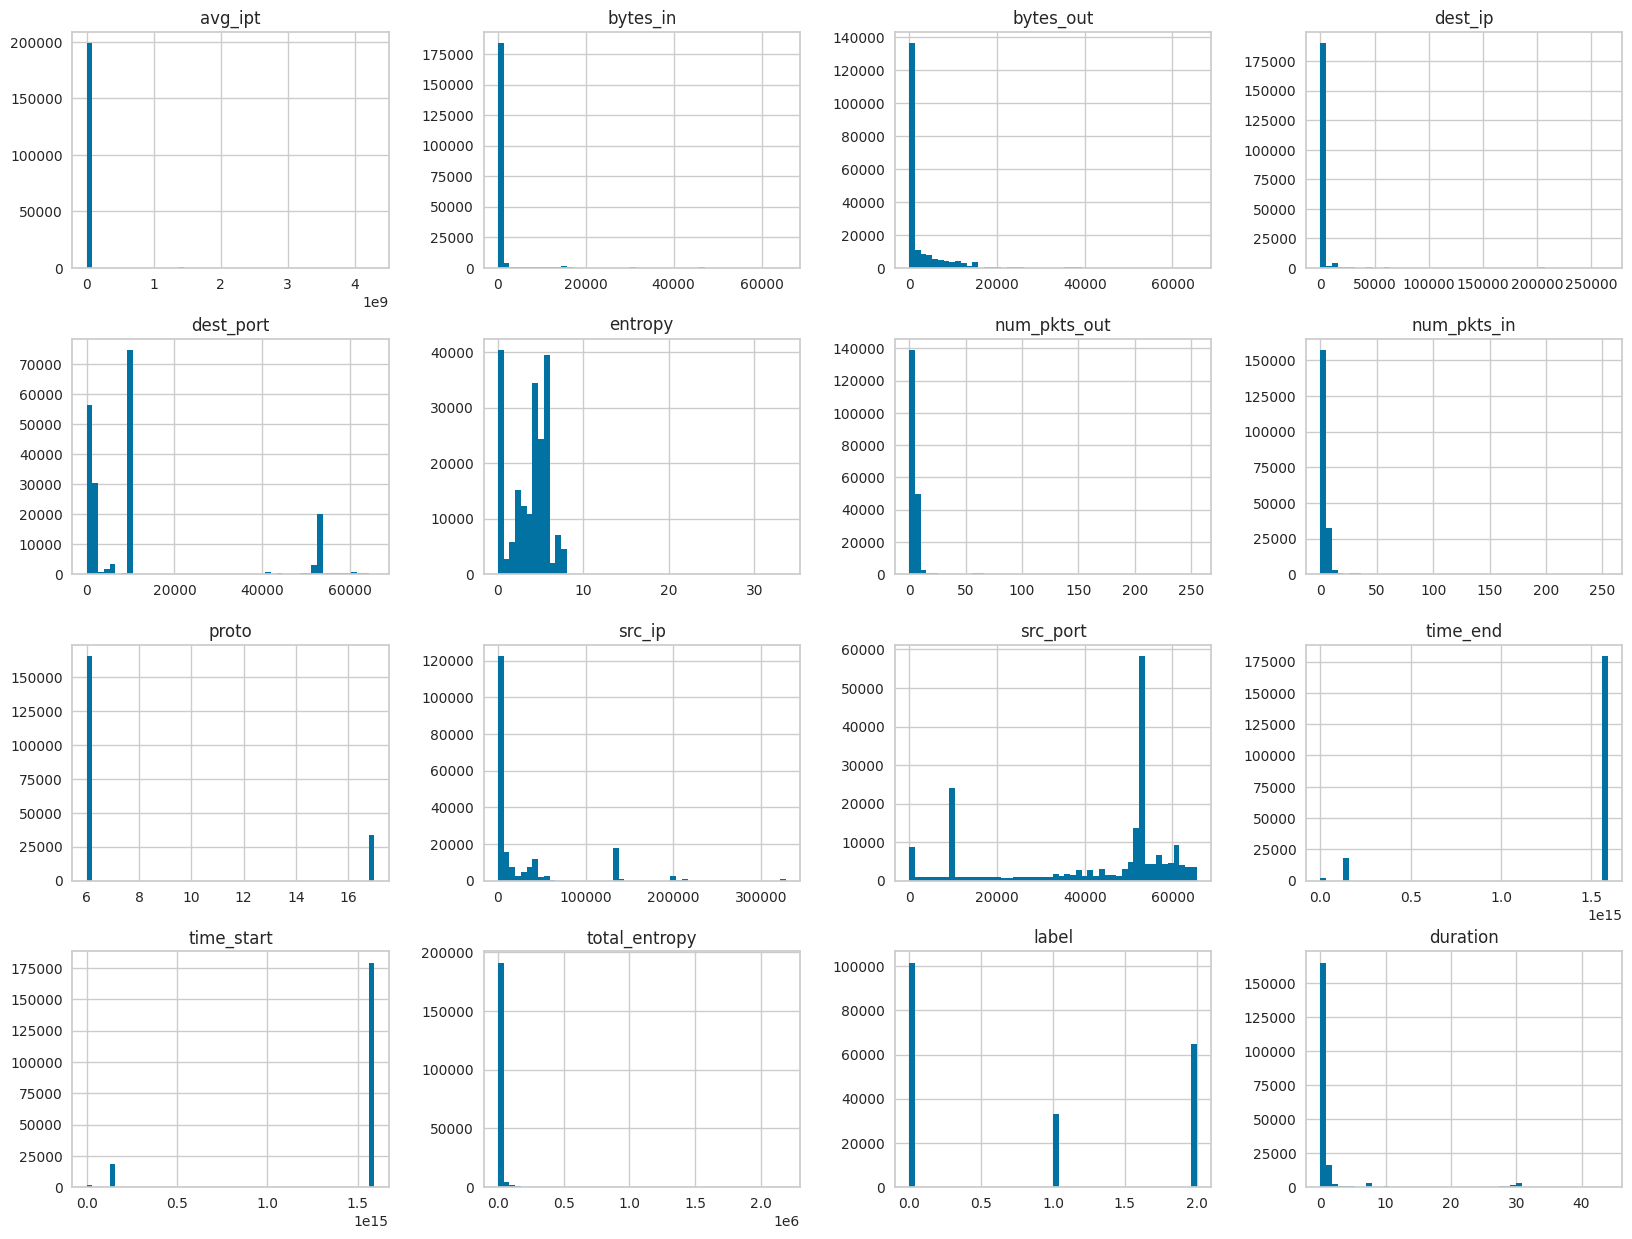

In [68]:
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='bytes_out', ylabel='bytes_out'>,
        <AxesSubplot:xlabel='bytes_in', ylabel='bytes_out'>,
        <AxesSubplot:xlabel='dest_ip', ylabel='bytes_out'>,
        <AxesSubplot:xlabel='src_ip', ylabel='bytes_out'>,
        <AxesSubplot:xlabel='label', ylabel='bytes_out'>],
       [<AxesSubplot:xlabel='bytes_out', ylabel='bytes_in'>,
        <AxesSubplot:xlabel='bytes_in', ylabel='bytes_in'>,
        <AxesSubplot:xlabel='dest_ip', ylabel='bytes_in'>,
        <AxesSubplot:xlabel='src_ip', ylabel='bytes_in'>,
        <AxesSubplot:xlabel='label', ylabel='bytes_in'>],
       [<AxesSubplot:xlabel='bytes_out', ylabel='dest_ip'>,
        <AxesSubplot:xlabel='bytes_in', ylabel='dest_ip'>,
        <AxesSubplot:xlabel='dest_ip', ylabel='dest_ip'>,
        <AxesSubplot:xlabel='src_ip', ylabel='dest_ip'>,
        <AxesSubplot:xlabel='label', ylabel='dest_ip'>],
       [<AxesSubplot:xlabel='bytes_out', ylabel='src_ip'>,
        <AxesSubplot:xlabel='bytes_in', ylabel='src_i

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


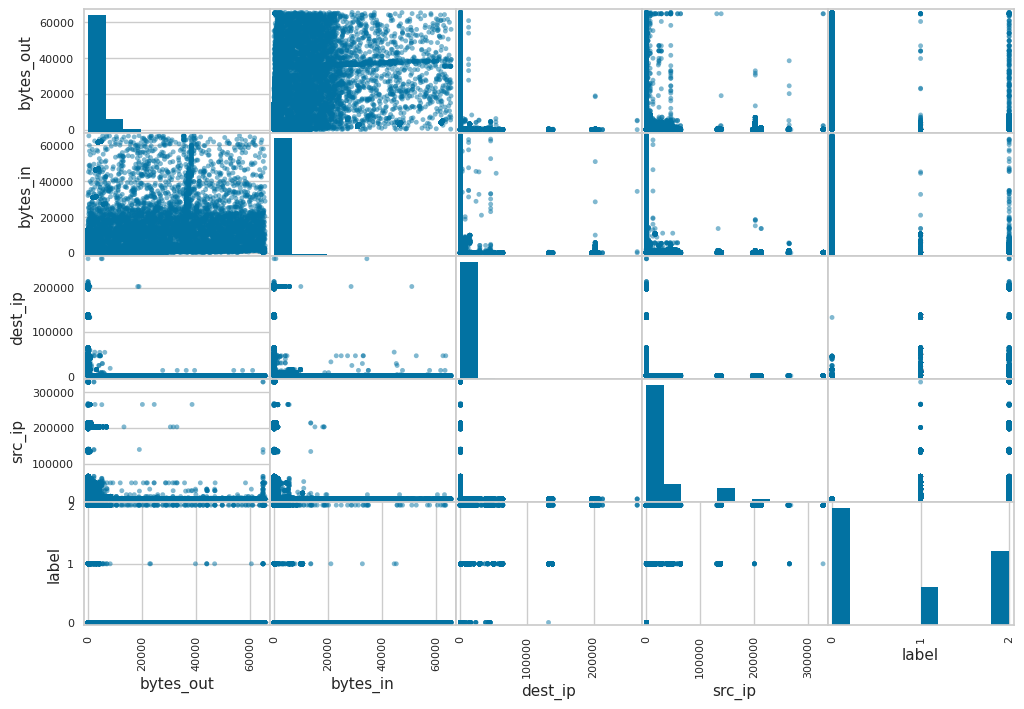

In [69]:
from pandas.plotting import scatter_matrix
attributes = ["bytes_out", "bytes_in", "dest_ip", "src_ip","label"]
scatter_matrix(df[attributes], figsize=(12,8))